In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

## Import Your Data

In [4]:
data = pd.read_csv('NetflixViewingHistory.csv')

## Format the Data ( Data Cleaning) 

In [8]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Weekday'] = data['Date'].dt.day_name()

C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_20724\3905778372.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


In [9]:
data.head()

,Title,Date,Year,Month,Weekday
0,The Great Indian Kapil Show: Season 1: The Per...,2025-07-26,2025,7,Saturday
1,The Great Indian Kapil Show: Season 1: Diamond...,2025-07-26,2025,7,Saturday
2,The Great Indian Kapil Show: Season 3: Mic Dro...,2025-07-26,2025,7,Saturday
3,Chilling Adventures of Sabrina: Part 1: Chapte...,2025-07-25,2025,7,Friday
4,The Sandman: Season 2: The Song of Orpheus,2025-07-24,2025,7,Thursday


## Titles watched per month

In [12]:
per_month = data.groupby(['Year','Month']).size()
per_month

Year  Month
2024  1          1
      2         16
      3         21
      4         14
      5        102
      6          2
      8          3
      9         21
      10        33
      11        18
      12        28
2025  1         14
      2          5
      3         19
      4         21
      5         10
      6         21
      7         56
dtype: int64

<Axes: xlabel='Year,Month'>

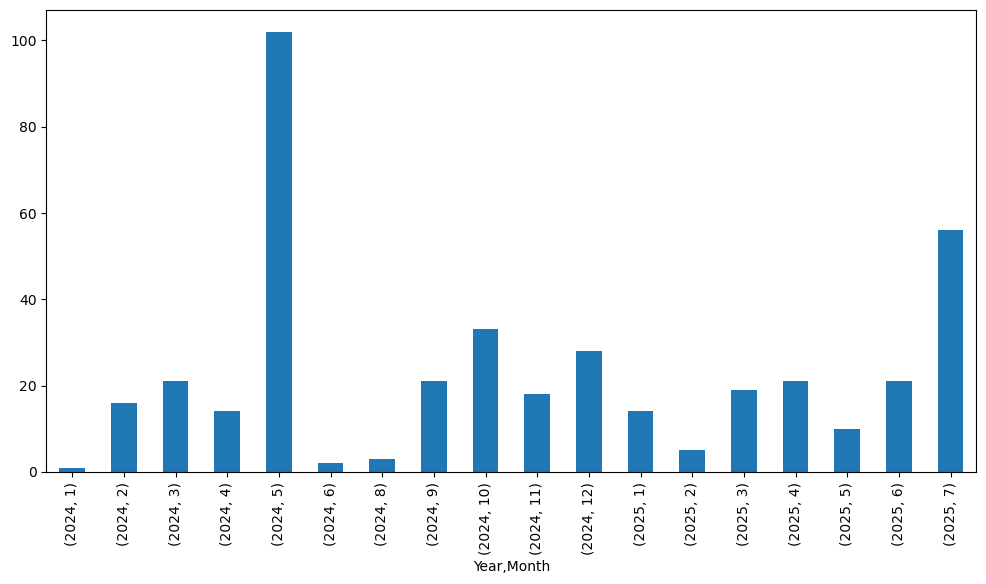

In [14]:
per_month.plot(kind='bar', figsize=(12,6))

## Top Titles watched 

In [17]:
top_titles = data['Title'].value_counts().head(10)

In [18]:
top_titles

Title
The Great Indian Kapil Show: Season 1: The Perfect Artist - Ed Sheeran             1
The Umbrella Academy: Season 1: I Heard a Rumor                                    1
Never Have I Ever: Season 4: ...had an identity crisis                             1
Never Have I Ever: Season 4: ...set my mom up                                      1
Never Have I Ever: Season 4: ...gone to prom                                       1
The Umbrella Academy: Season 1: We Only See Each Other at Weddings and Funerals    1
The Umbrella Academy: Season 1: Run Boy Run                                        1
The Umbrella Academy: Season 1: Extra Ordinary                                     1
The Umbrella Academy: Season 1: Man on the Moon                                    1
The Umbrella Academy: Season 1: Number Five                                        1
Name: count, dtype: int64

<Axes: ylabel='Title'>

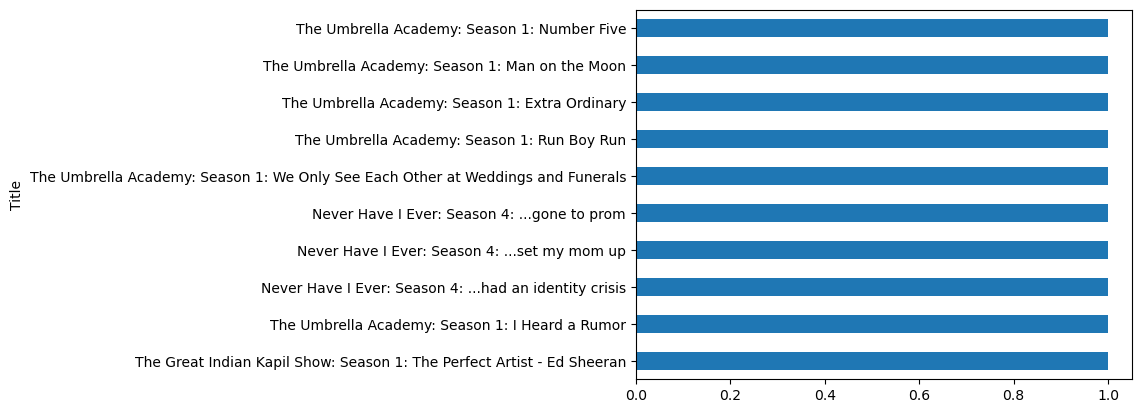

In [19]:
top_titles.plot(kind = 'barh')

## Titles watched per day 

<Axes: ylabel='Weekday'>

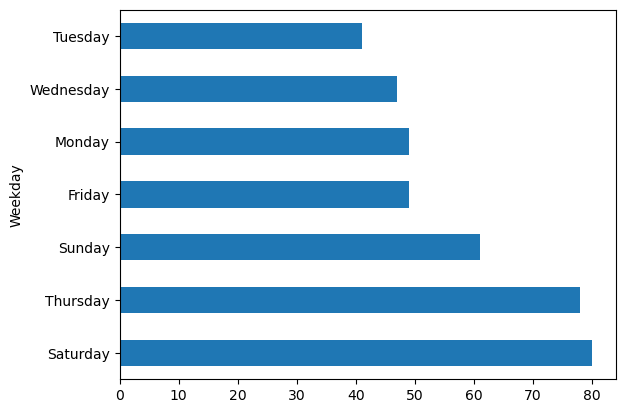

In [22]:
data['Weekday'].value_counts().plot(kind = 'barh')

## Titles watched monthly

<Axes: xlabel='Month'>

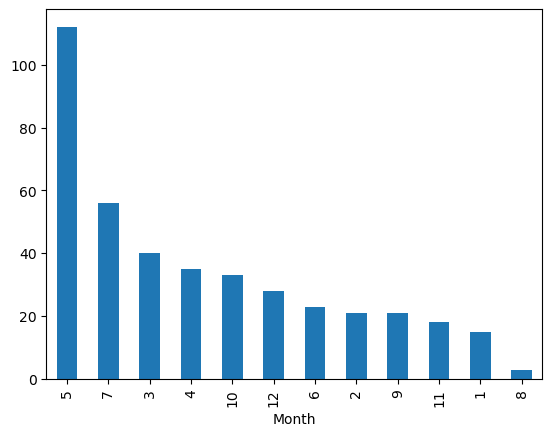

In [25]:
data['Month'].value_counts().plot(kind = 'bar')

## Total Titles watched 

In [26]:
len(data)

405

In [27]:
data['Date'].nunique()

111

## Titles having highest binge count

In [30]:
titles_per_day = data['Date'].value_counts().sort_index()
titles_per_day.head(10)

Date
2024-01-29    1
2024-02-12    2
2024-02-13    1
2024-02-15    7
2024-02-16    6
2024-03-03    2
2024-03-04    7
2024-03-05    3
2024-03-09    4
2024-03-10    2
Name: count, dtype: int64

## Titles watched this year

In [40]:
monthly_watch = data[data['Year'] == 2025] ['Month'].value_counts().sort_index()
print(monthly_watch)

Month
1    14
2     5
3    19
4    21
5    10
6    21
7    56
Name: count, dtype: int64


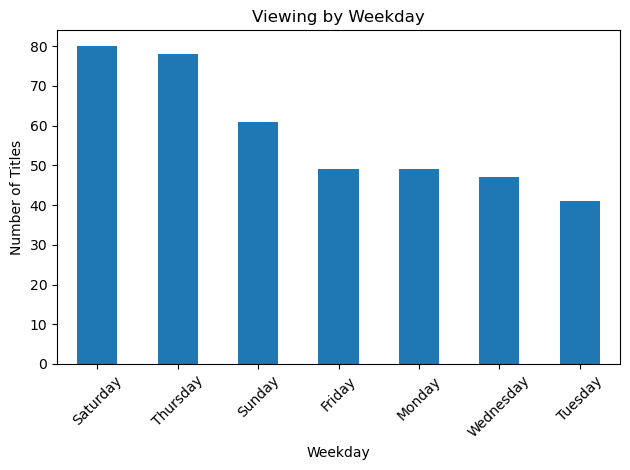

In [34]:
# Watch count per weekday
data['Weekday'].value_counts().plot(kind='bar', title='Viewing by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()

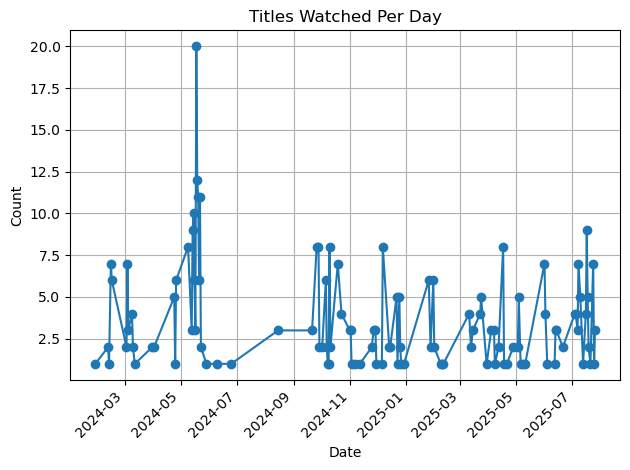

In [35]:
# Watch count per date
data['Date'].value_counts().sort_index().plot(kind='line', title='Titles Watched Per Day', marker='o')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

In [42]:
watch_count = data['Weekday'].value_counts()
watch_count

Weekday
Saturday     80
Thursday     78
Sunday       61
Friday       49
Monday       49
Wednesday    47
Tuesday      41
Name: count, dtype: int64

<Axes: xlabel='Weekday'>

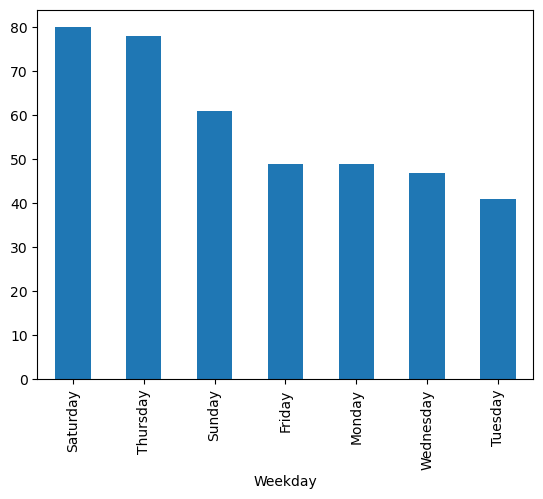

In [43]:
watch_count.plot(kind = 'bar')

In [52]:
data['Title'].value_counts().head(20)


Title
The Great Indian Kapil Show: Season 1: The Perfect Artist - Ed Sheeran             1
The Umbrella Academy: Season 1: I Heard a Rumor                                    1
Never Have I Ever: Season 4: ...had an identity crisis                             1
Never Have I Ever: Season 4: ...set my mom up                                      1
Never Have I Ever: Season 4: ...gone to prom                                       1
The Umbrella Academy: Season 1: We Only See Each Other at Weddings and Funerals    1
The Umbrella Academy: Season 1: Run Boy Run                                        1
The Umbrella Academy: Season 1: Extra Ordinary                                     1
The Umbrella Academy: Season 1: Man on the Moon                                    1
The Umbrella Academy: Season 1: Number Five                                        1
The Umbrella Academy: Season 1: The Day That Wasn't                                1
The Umbrella Academy: Season 1: The Day That Was           

## Weekdays vs Month viewing trend

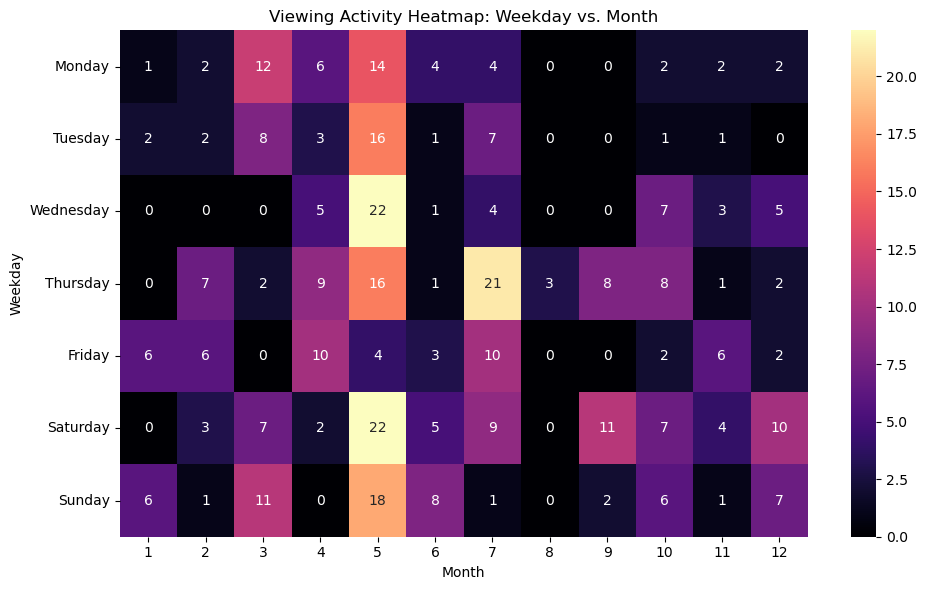

In [54]:
# Step 1: Pivot Table
heatmap_data = data.pivot_table(
    index='Weekday',   # rows
    columns='Month',   # columns
    values='Title',    # value to count
    aggfunc='count',
    fill_value=0
)

# Step 2: Reorder Weekdays (optional but cleaner)
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(weekday_order)

# Step 3: Plot Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='magma')
plt.title('Viewing Activity Heatmap: Weekday vs. Month')
plt.xlabel('Month')
plt.ylabel('Weekday')
plt.tight_layout()
plt.show()
